<a href="https://colab.research.google.com/github/A-VIRAL-GUPTAA/gdg-probation-task-1/blob/main/gdg_ride_task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
df=pd.read_csv('/content/Ride_booking.csv')


In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 21 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Date                               150000 non-null  object 
 1   Time                               150000 non-null  object 
 2   Booking ID                         150000 non-null  object 
 3   Booking Status                     150000 non-null  object 
 4   Customer ID                        150000 non-null  object 
 5   Vehicle Type                       150000 non-null  object 
 6   Pickup Location                    150000 non-null  object 
 7   Drop Location                      150000 non-null  object 
 8   Avg VTAT                           139500 non-null  float64
 9   Avg CTAT                           102000 non-null  float64
 10  Cancelled Rides by Customer        10500 non-null   float64
 11  Reason for cancelling by Customer  1050

In [8]:
print(df.isnull().sum())


Date                                      0
Time                                      0
Booking ID                                0
Booking Status                            0
Customer ID                               0
Vehicle Type                              0
Pickup Location                           0
Drop Location                             0
Avg VTAT                              10500
Avg CTAT                              48000
Cancelled Rides by Customer          139500
Reason for cancelling by Customer    139500
Cancelled Rides by Driver            123000
Driver Cancellation Reason           123000
Incomplete Rides                     141000
Incomplete Rides Reason              141000
Booking Value                         48000
Ride Distance                         48000
Driver Ratings                        57000
Customer Rating                       57000
Payment Method                        48000
dtype: int64


In [12]:
print(df[df['Booking Status'] == 'No Driver Found'].shape[0])

10500


it was observed as most of the null values were in the rows which had no driver found as booking status

In [14]:
df = df[df['Booking Status'] != 'No Driver Found'].copy()

rows having no driver found as booking status were removed

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 139500 entries, 1 to 149999
Data columns (total 21 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Date                               139500 non-null  object 
 1   Time                               139500 non-null  object 
 2   Booking ID                         139500 non-null  object 
 3   Booking Status                     139500 non-null  object 
 4   Customer ID                        139500 non-null  object 
 5   Vehicle Type                       139500 non-null  object 
 6   Pickup Location                    139500 non-null  object 
 7   Drop Location                      139500 non-null  object 
 8   Avg VTAT                           139500 non-null  float64
 9   Avg CTAT                           102000 non-null  float64
 10  Cancelled Rides by Customer        10500 non-null   float64
 11  Reason for cancelling by Customer  10500 non

In [17]:
print(df[df['Booking Status'] == 'No Driver Found'].shape[0])

0


In [18]:
print(df.isnull().sum())


Date                                      0
Time                                      0
Booking ID                                0
Booking Status                            0
Customer ID                               0
Vehicle Type                              0
Pickup Location                           0
Drop Location                             0
Avg VTAT                                  0
Avg CTAT                              37500
Cancelled Rides by Customer          129000
Reason for cancelling by Customer    129000
Cancelled Rides by Driver            112500
Driver Cancellation Reason           112500
Incomplete Rides                     130500
Incomplete Rides Reason              130500
Booking Value                         37500
Ride Distance                         37500
Driver Ratings                        46500
Customer Rating                       46500
Payment Method                        37500
dtype: int64


In [20]:
df.drop_duplicates(inplace=True)

removed exact duplicate rows

In [21]:
cols_to_convert = ['Ride Distance', 'Booking Value', 'Avg CTAT', 'Driver Ratings', 'Customer Rating']
for col in cols_to_convert:
    df[col] = pd.to_numeric(df[col], errors='coerce')

Converted numbers stored as text (e.g., Ride Distance) into numeric.

In [22]:
categorical_cols = ['Booking Status', 'Vehicle Type', 'Pickup Location', 'Drop Location', 'Payment Method']
for col in categorical_cols:
    if col in df.columns and df[col].dtype == 'object':
        df[col] = df[col].str.lower()

I have standardized the categorical columns by converting them to lowercase.

data cleaning completed

In [24]:
# Drop rows where 'Date' or 'Time' is missing
df.dropna(subset=['Date', 'Time'], inplace=True)

# Drop rows where both 'Pickup Location' and 'Drop Location' are missing
df.dropna(subset=['Pickup Location', 'Drop Location'], how='all', inplace=True)

drop rows missing critical info (like booking datetime or both pickup & drop).  colums could have also be droppd but then we could have lost imp insights

In [25]:
# Fill missing values in numerical columns with the median
numerical_cols_to_fill = ['Ride Distance', 'Avg CTAT', 'Booking Value', 'Driver Ratings', 'Customer Rating']
for col in numerical_cols_to_fill:
    if col in df.columns:
        df[col].fillna(df[col].median(), inplace=True)

# Fill missing values in 'Payment Method' with 'Unknown'
if 'Payment Method' in df.columns:
    df['Payment Method'].fillna('unknown', inplace=True)

# Check the number of remaining missing values
print(df.isnull().sum())

Date               0
Time               0
Booking ID         0
Booking Status     0
Customer ID        0
Vehicle Type       0
Pickup Location    0
Drop Location      0
Avg VTAT           0
Avg CTAT           0
Booking Value      0
Ride Distance      0
Driver Ratings     0
Customer Rating    0
Payment Method     0
dtype: int64


/tmp/ipython-input-3826372213.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
/tmp/ipython-input-3826372213.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

In [26]:
# Check and remove rows with impossible 'Ride Distance' values (<= 0)
initial_rows = len(df)
df = df[df['Ride Distance'] > 0].copy()
print(f"Removed {initial_rows - len(df)} rows with impossible Ride Distance values (<= 0).")

# Check and remove rows with impossible 'Driver Ratings' values (not between 1 and 5)
initial_rows = len(df)
df = df[(df['Driver Ratings'] >= 1) & (df['Driver Ratings'] <= 5)].copy()
print(f"Removed {initial_rows - len(df)} rows with impossible Driver Ratings values (not between 1 and 5).")

# Check and remove rows with impossible 'Customer Rating' values (not between 1 and 5)
initial_rows = len(df)
df = df[(df['Customer Rating'] >= 1) & (df['Customer Rating'] <= 5)].copy()
print(f"Removed {initial_rows - len(df)} rows with impossible Customer Rating values (not between 1 and 5).")

# Check the shape of the dataframe after removing impossible values
print("Shape of the DataFrame after removing impossible values:", df.shape)

Removed 0 rows with impossible Ride Distance values (<= 0).
Removed 0 rows with impossible Driver Ratings values (not between 1 and 5).
Removed 0 rows with impossible Customer Rating values (not between 1 and 5).
Shape of the DataFrame after removing impossible values: (139500, 15)


Checked if values make sense:

Ride Distance > 0
Ratings between 1 and 5

removed impossible values (negative distances, ratings >5).

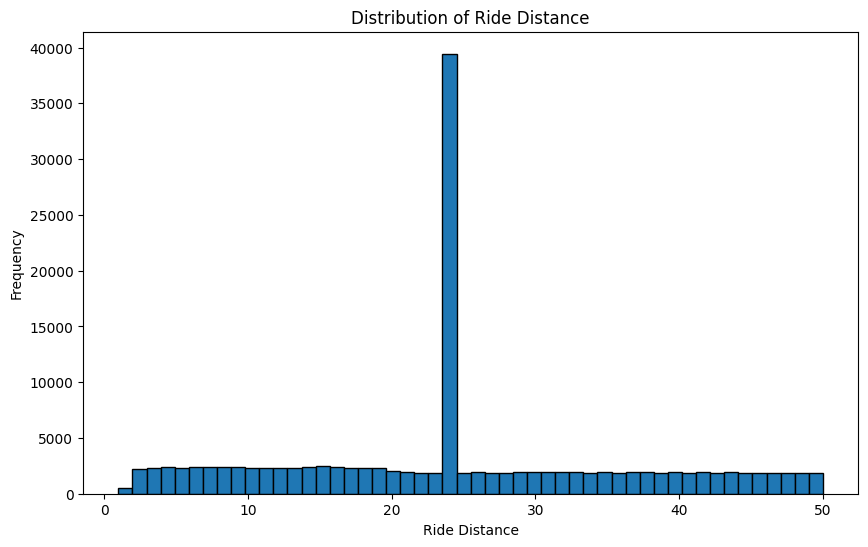

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(df['Ride Distance'], bins=50, edgecolor='black')
plt.title('Distribution of Ride Distance')
plt.xlabel('Ride Distance')
plt.ylabel('Frequency')
plt.show()

The histogram shows the distribution of ride distances. There seems to be a concentration of rides around 25 units, and the distribution extends up to 50 units.

Capped 'Ride Distance' at the 99th percentile: 49.26


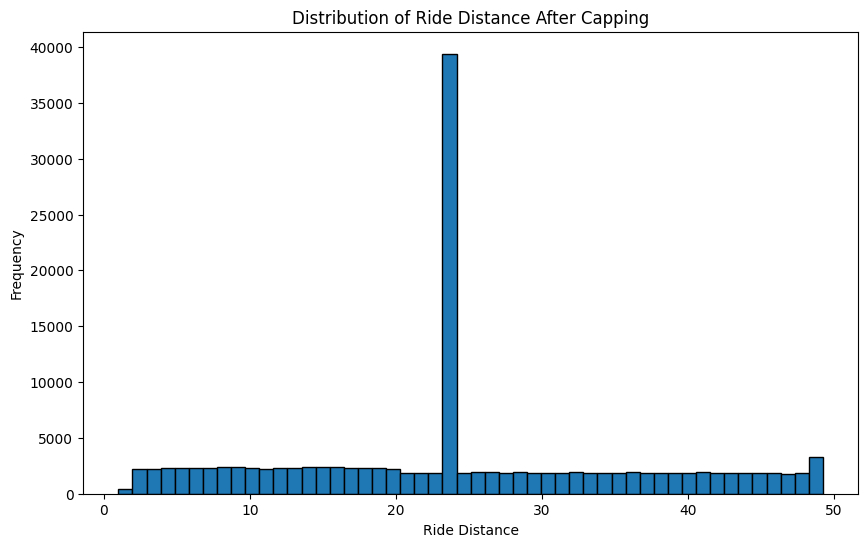

In [28]:
# Calculate the 99th percentile of 'Ride Distance'
percentile_99 = df['Ride Distance'].quantile(0.99)

# Cap the 'Ride Distance' at the 99th percentile
df['Ride Distance'] = df['Ride Distance'].clip(upper=percentile_99)

print(f"Capped 'Ride Distance' at the 99th percentile: {percentile_99:.2f}")

# Optional: Plot the histogram again to see the effect of capping
plt.figure(figsize=(10, 6))
plt.hist(df['Ride Distance'], bins=50, edgecolor='black')
plt.title('Distribution of Ride Distance After Capping')
plt.xlabel('Ride Distance')
plt.ylabel('Frequency')
plt.show()

Based on the histogram, there are some rides with longer distances. To handle potential extreme values in 'Ride Distance', we capped the values at the 99th percentile. This will limit the influence of very large distances without removing valid data points.

/tmp/ipython-input-1773839540.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='viridis')


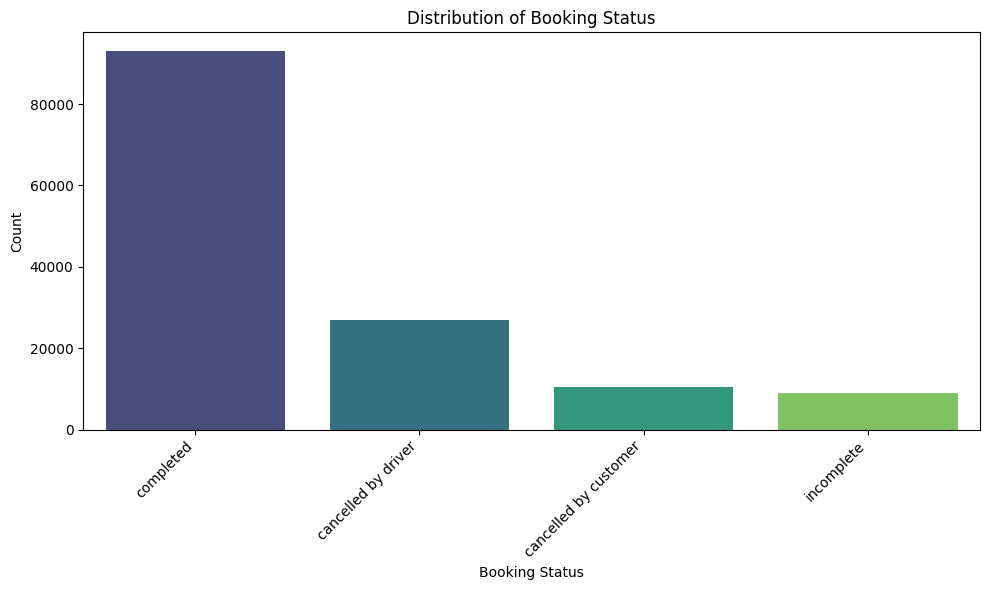

/tmp/ipython-input-1773839540.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='viridis')


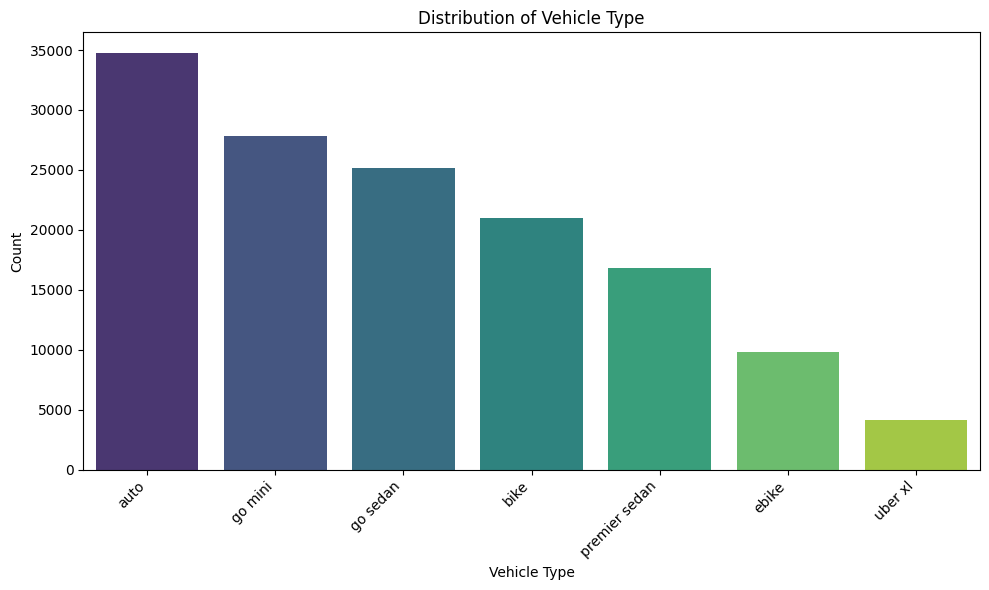

/tmp/ipython-input-1773839540.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='viridis')


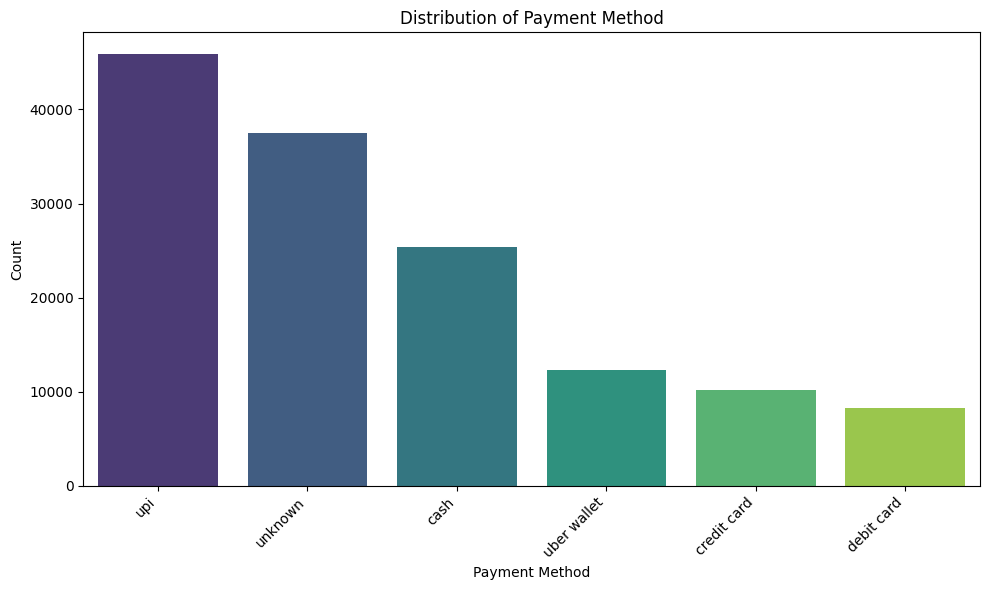

In [29]:
import seaborn as sns

categorical_cols_to_plot = ['Booking Status', 'Vehicle Type', 'Payment Method']

for col in categorical_cols_to_plot:
    if col in df.columns:
        plt.figure(figsize=(10, 6))
        sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='viridis')
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

Univariate Analysis

Counted plots for Booking Status, Vehicle Type, Payment Method.

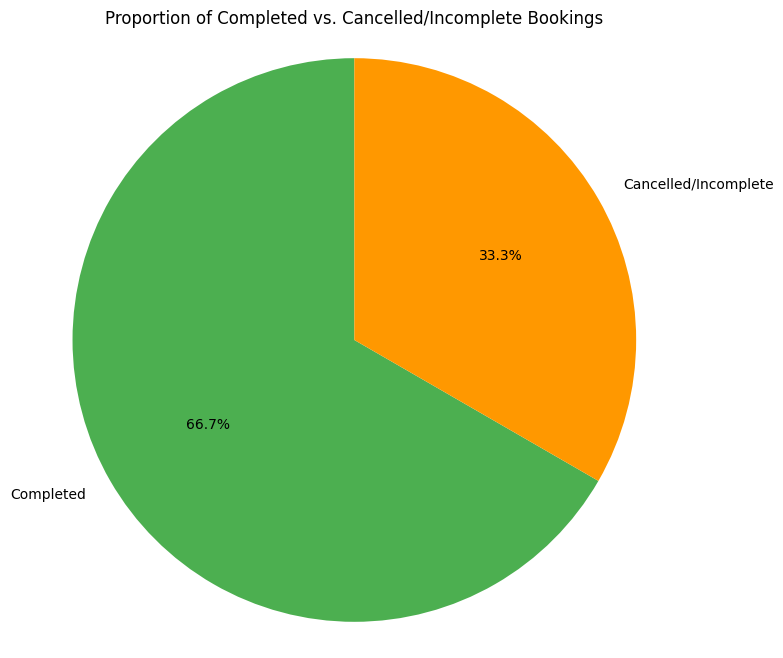

In [31]:
# Count the occurrences of each booking status
booking_status_counts = df['Booking Status'].value_counts()

# Group cancellation statuses
cancellation_counts = booking_status_counts[['cancelled by driver', 'cancelled by customer', 'incomplete']].sum()
completed_count = booking_status_counts['completed']

# Create data for the pie chart
pie_data = pd.Series([completed_count, cancellation_counts], index=['Completed', 'Cancelled/Incomplete'])

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(pie_data, labels=pie_data.index, autopct='%1.1f%%', startangle=90, colors=['#4CAF50', '#FF9800'])
plt.title('Proportion of Completed vs. Cancelled/Incomplete Bookings')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

Pie chart for cancellation vs completion.
we can see that ride completion dominates.

/tmp/ipython-input-1746411064.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Time'] = pd.to_datetime(df['Time'], errors='coerce').dt.time


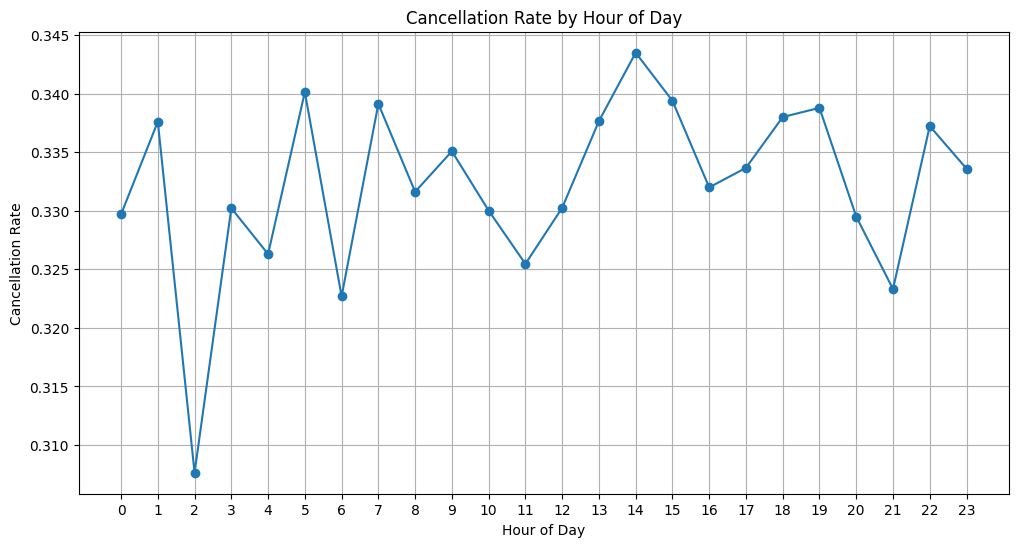

In [32]:
# Convert 'Time' to datetime objects (handling potential errors)
df['Time'] = pd.to_datetime(df['Time'], errors='coerce').dt.time

# Extract the hour from the 'Time' column
df['Hour'] = df['Time'].apply(lambda x: x.hour if pd.notnull(x) else None)

# Categorize bookings as cancelled/incomplete or completed
df['Cancellation_Status'] = df['Booking Status'].apply(lambda x: 'Cancelled/Incomplete' if x in ['cancelled by driver', 'cancelled by customer', 'incomplete'] else 'Completed')

# Group by hour and cancellation status, then unstack to get counts
cancellation_by_hour = df.groupby(['Hour', 'Cancellation_Status']).size().unstack(fill_value=0)

# Calculate cancellation rate
cancellation_by_hour['Cancellation_Rate'] = cancellation_by_hour['Cancelled/Incomplete'] / (cancellation_by_hour['Cancelled/Incomplete'] + cancellation_by_hour['Completed'])

# Sort by hour
cancellation_by_hour = cancellation_by_hour.sort_index()

# Plot the cancellation rate by hour
plt.figure(figsize=(12, 6))
plt.plot(cancellation_by_hour.index, cancellation_by_hour['Cancellation_Rate'], marker='o')
plt.title('Cancellation Rate by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Cancellation Rate')
plt.xticks(range(24)) # Set x-axis ticks to show all hours
plt.grid(True)
plt.show()

Bivariate Analysis (Two Features Together)

Cancellation rate by hour of day.

insight:--
The cancellation rate fluctuates throughout the day, but it seems to stay within a relatively narrow range, roughly between 31% and 34.5%.

There isn't a clear, consistent pattern of increase or decrease throughout the entire day.

There appear to be some peaks and dips at various hours. For example, there's a noticeable peak around hour 14 (2 PM), suggesting a slightly higher cancellation rate during that time. There are also some lower points, like around hour 2 (2 AM).

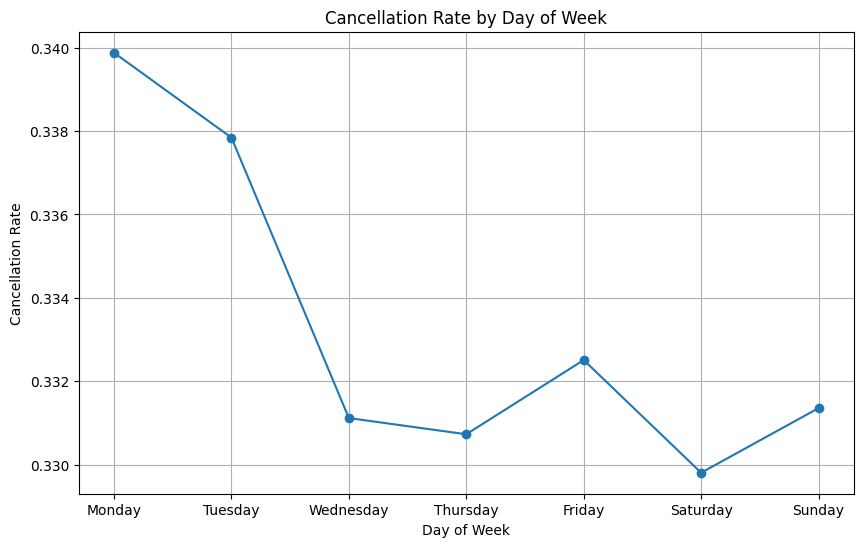

In [33]:
# Convert 'Date' to datetime objects
df['Date'] = pd.to_datetime(df['Date'])

# Extract the day of the week
df['Day_of_Week'] = df['Date'].dt.day_name()

# Group by day of the week and cancellation status, then unstack to get counts
cancellation_by_day = df.groupby(['Day_of_Week', 'Cancellation_Status']).size().unstack(fill_value=0)

# Calculate cancellation rate
cancellation_by_day['Cancellation_Rate'] = cancellation_by_day['Cancelled/Incomplete'] / (cancellation_by_day['Cancelled/Incomplete'] + cancellation_by_day['Completed'])

# Define the order of the days of the week for plotting
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Sort by day of the week
cancellation_by_day = cancellation_by_day.reindex(day_order)

# Plot the cancellation rate by day of the week
plt.figure(figsize=(10, 6))
plt.plot(cancellation_by_day.index, cancellation_by_day['Cancellation_Rate'], marker='o')
plt.title('Cancellation Rate by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Cancellation Rate')
plt.grid(True)
plt.show()

Bivariate Analysis (Two Features Together)
Cancellation rate by day of week.

insights
Higher Cancellation Early in the Week: The cancellation rate appears to be highest at the beginning of the week, specifically on Monday and Tuesday.

Lower Cancellation Mid-Week: There is a noticeable dip in the cancellation rate during the mid-week, on Wednesday and Thursday.


Slight Increase Towards the Weekend: The cancellation rate seems to increase slightly towards the end of the week, on Friday, Saturday, and Sunday, but it does not reach the same level as the beginning of the week.


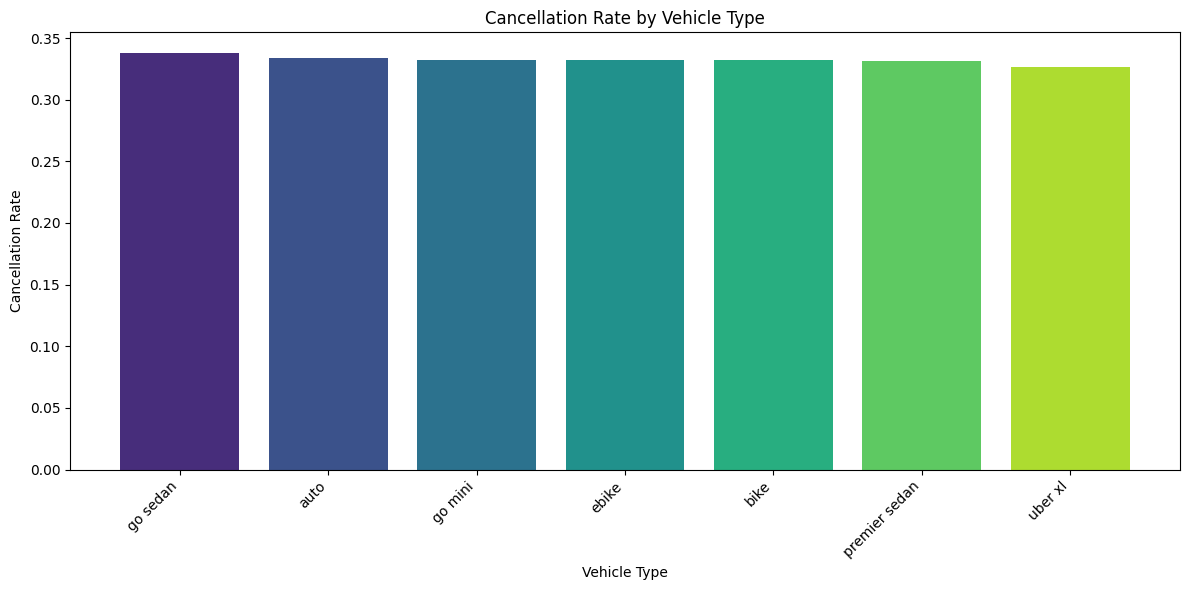

In [34]:
# Group by vehicle type and cancellation status, then unstack to get counts
cancellation_by_vehicle = df.groupby(['Vehicle Type', 'Cancellation_Status']).size().unstack(fill_value=0)

# Calculate cancellation rate
cancellation_by_vehicle['Cancellation_Rate'] = cancellation_by_vehicle['Cancelled/Incomplete'] / (cancellation_by_vehicle['Cancelled/Incomplete'] + cancellation_by_vehicle['Completed'])

# Sort by cancellation rate for better visualization
cancellation_by_vehicle = cancellation_by_vehicle.sort_values(by='Cancellation_Rate', ascending=False)

# Plot the cancellation rate by vehicle type
plt.figure(figsize=(12, 6))
plt.bar(cancellation_by_vehicle.index, cancellation_by_vehicle['Cancellation_Rate'], color=sns.color_palette('viridis', len(cancellation_by_vehicle)))
plt.title('Cancellation Rate by Vehicle Type')
plt.xlabel('Vehicle Type')
plt.ylabel('Cancellation Rate')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Bivariate Analysis (Two Features Together)Cancellation rate by vehicle type.

insights

The cancellation rates across different vehicle types appear to be relatively similar, all falling within a narrow range, roughly between 32.5% and 34%.

'go sedan' seems to have the highest cancellation rate, although the difference compared to other vehicle types is not very large.

'uber xl' appears to have the lowest cancellation rate among the listed vehicle types.

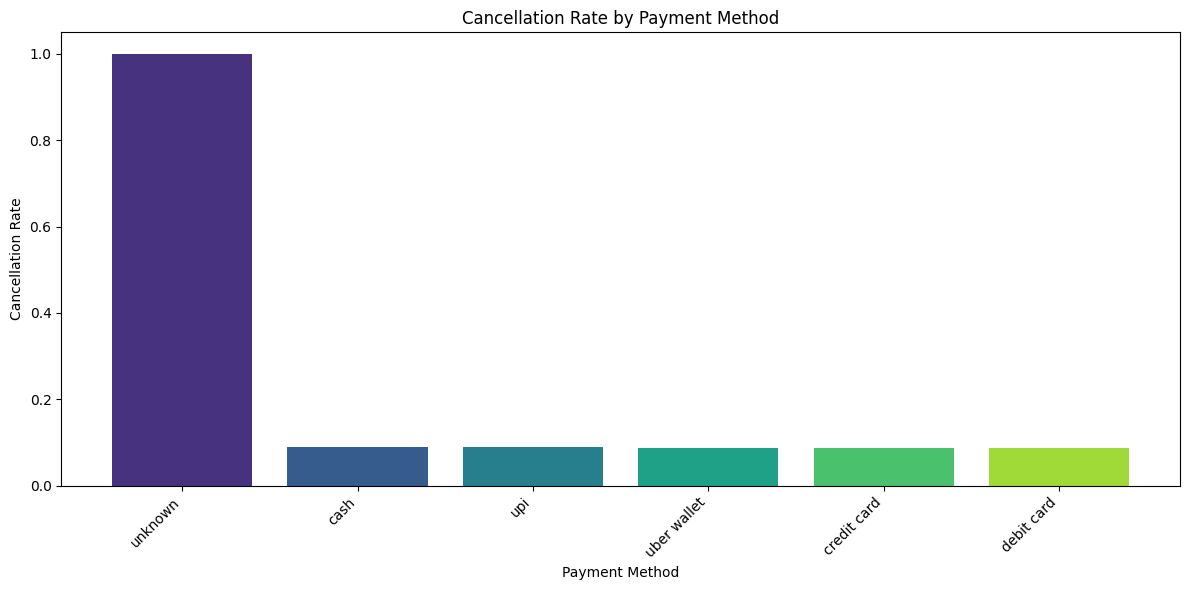

In [35]:
# Group by payment method and cancellation status, then unstack to get counts
cancellation_by_payment = df.groupby(['Payment Method', 'Cancellation_Status']).size().unstack(fill_value=0)

# Calculate cancellation rate
cancellation_by_payment['Cancellation_Rate'] = cancellation_by_payment['Cancelled/Incomplete'] / (cancellation_by_payment['Cancelled/Incomplete'] + cancellation_by_payment['Completed'])

# Sort by cancellation rate for better visualization
cancellation_by_payment = cancellation_by_payment.sort_values(by='Cancellation_Rate', ascending=False)

# Plot the cancellation rate by payment method
plt.figure(figsize=(12, 6))
plt.bar(cancellation_by_payment.index, cancellation_by_payment['Cancellation_Rate'], color=sns.color_palette('viridis', len(cancellation_by_payment)))
plt.title('Cancellation Rate by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Cancellation Rate')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Bivariate Analysis (Two Features Together)Cancellation rate by payment method.

insights:

The 'unknown' payment method has a cancellation rate of 100%. This is likely due to how missing values in the 'Payment Method' column were handled (filled with 'unknown') and how cancellations were recorded for those rows. It's important to note that this doesn't necessarily mean all rides with an unknown payment method were cancelled, but rather that among the rows where the payment method was initially missing and later filled as 'unknown', all of them were associated with a cancellation or incomplete status.


For the known payment methods (cash, upi, uber wallet, credit card, and debit card), the cancellation rates are much lower and appear to be relatively similar, all falling within a narrow range, roughly between 8.5% and 9%.


This suggests that for bookings where a specific payment method was recorded, the cancellation rate is significantly lower and more consistent compared to cases where the payment method was initially unknown. The 'unknown' category likely represents a different scenario or data collection issue.

also drivers and users collaborate to avoid the mediator app to avoid commisions.

Time Series **Analysis**

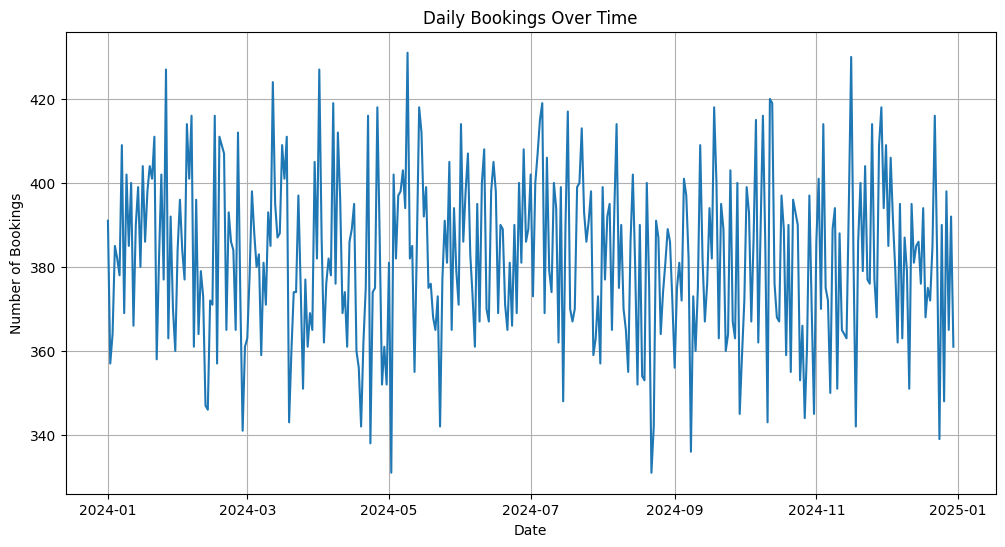

In [38]:
# Aggregate data by day and count the number of bookings
daily_bookings = df.groupby(df['Date'].dt.date).size()

# Plot daily bookings over time
plt.figure(figsize=(12, 6))
daily_bookings.plot()
plt.title('Daily Bookings Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Bookings')
plt.grid(True)
plt.show()

insight
There appears to be a fair amount of day-to-day fluctuation in the number of bookings.

There doesn't seem to be a strong overall increasing or decreasing trend in booking volume throughout the year.

There might be some cyclical patterns within weeks or months, as indicated by the repeated up and down movements in the line, but these are not extremely pronounced.

There are occasional sharper peaks and dips, which could correspond to specific days of the week, holidays, or other events.

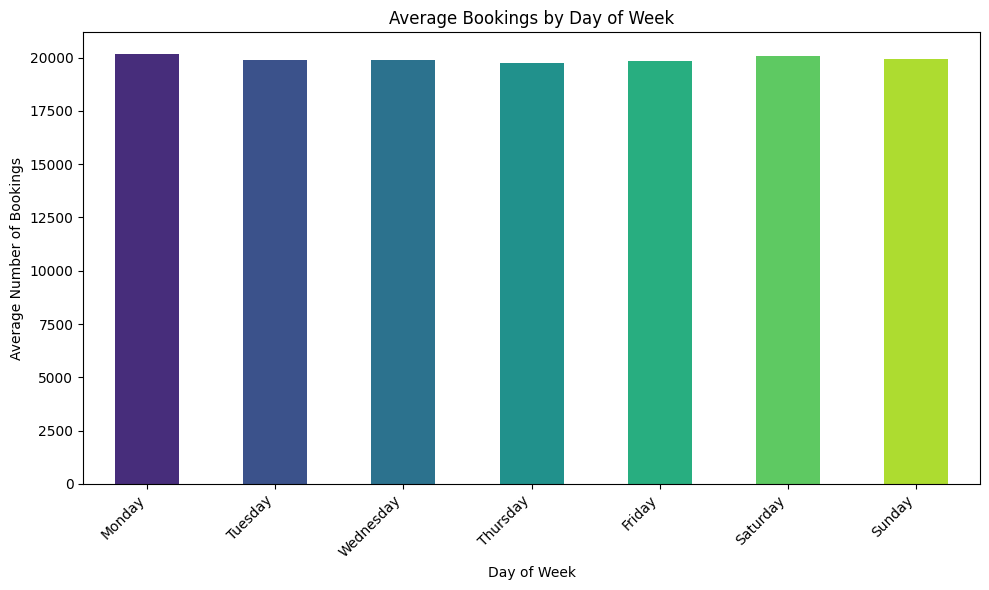

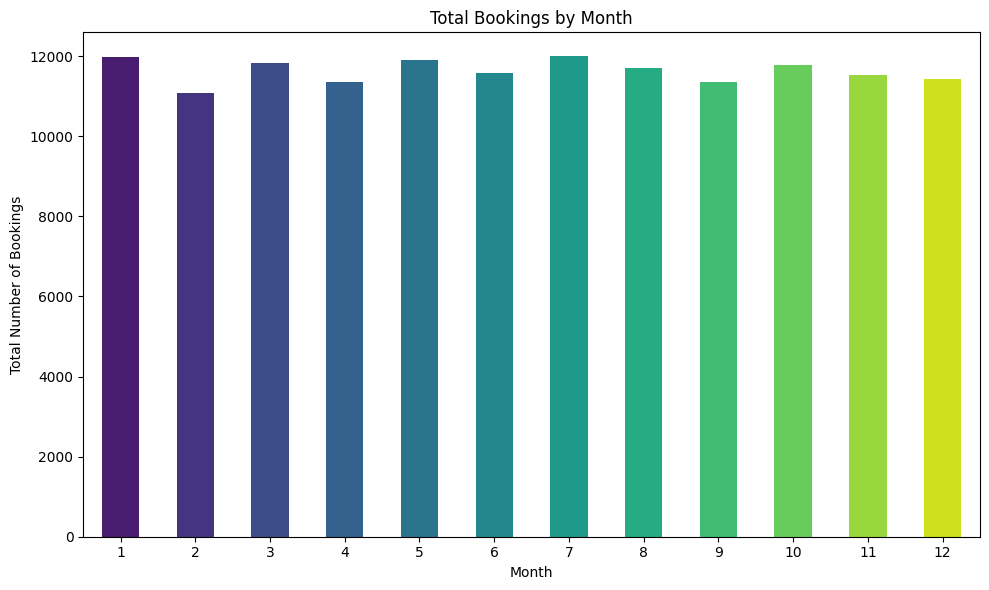

In [39]:
# Extract month from the Date
df['Month'] = df['Date'].dt.month

# Group by day of the week and calculate the average number of bookings
average_bookings_by_day = df.groupby('Day_of_Week').size().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Plot average bookings by day of the week
plt.figure(figsize=(10, 6))
average_bookings_by_day.plot(kind='bar', color=sns.color_palette('viridis', len(average_bookings_by_day)))
plt.title('Average Bookings by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Average Number of Bookings')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Group by month and count the number of bookings
monthly_bookings = df.groupby('Month').size()

# Plot monthly bookings
plt.figure(figsize=(10, 6))
monthly_bookings.plot(kind='bar', color=sns.color_palette('viridis', len(monthly_bookings)))
plt.title('Total Bookings by Month')
plt.xlabel('Month')
plt.ylabel('Total Number of Bookings')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

insight:
Average Bookings by Day of Week:

Looking at the bar chart for average bookings by day of the week, the number of bookings appears to be relatively consistent across all days of the week.

There are slight variations, but no single day stands out as having a significantly higher or lower average number of bookings compared to the others.
This suggests that, based on this data, there isn't a strong weekly seasonality pattern in terms of the total volume of bookings.

Total Bookings by Month:

The bar chart for total bookings by month shows that the booking volume is also relatively stable throughout the year.
There are some minor fluctuations from month to month, but no clear peaks or dips that would indicate strong monthly seasonality.

In conclusion, based on these plots, there doesn't appear to be significant seasonality in the overall booking volume, either on a weekly or monthly basis. The number of bookings seems to be relatively consistent throughout the week and across the months of the year.

In [40]:
# Group by cancellation status and calculate the mean driver and customer ratings
average_ratings_by_cancellation = df.groupby('Cancellation_Status')[['Driver Ratings', 'Customer Rating']].mean()

print("Average Driver and Customer Ratings by Cancellation Status:")
print(average_ratings_by_cancellation)

Average Driver and Customer Ratings by Cancellation Status:
                      Driver Ratings  Customer Rating
Cancellation_Status                                  
Cancelled/Incomplete        4.300000         4.500000
Completed                   4.230992         4.404584


Ratings Analysis

Compared average driver/customer ratings for completed vs cancelled rides.

insight:
Driver Ratings: The average driver rating for "Cancelled/Incomplete" rides (4.30) is slightly higher than for "Completed" rides (4.23).

Customer Ratings: Similarly, the average customer rating for "Cancelled/Incomplete" rides (4.50) is also slightly higher than for "Completed" rides (4.40).


Correlation Matrix of Numerical Features:


,Ride Distance,Avg VTAT,Avg CTAT,Booking Value,Driver Ratings,Customer Rating
Ride Distance,1.000000,0.050538,0.102135,0.009262,-0.019029,-0.019519
Avg VTAT,0.050538,1.000000,0.050822,-0.006949,-0.006283,-0.005773
Avg CTAT,0.102135,0.050822,1.000000,0.002710,-0.015771,-0.021783
Booking Value,0.009262,-0.006949,0.002710,1.000000,-0.009737,-0.013332
Driver Ratings,-0.019029,-0.006283,-0.015771,-0.009737,1.000000,0.010340
Customer Rating,-0.019519,-0.005773,-0.021783,-0.013332,0.010340,1.000000


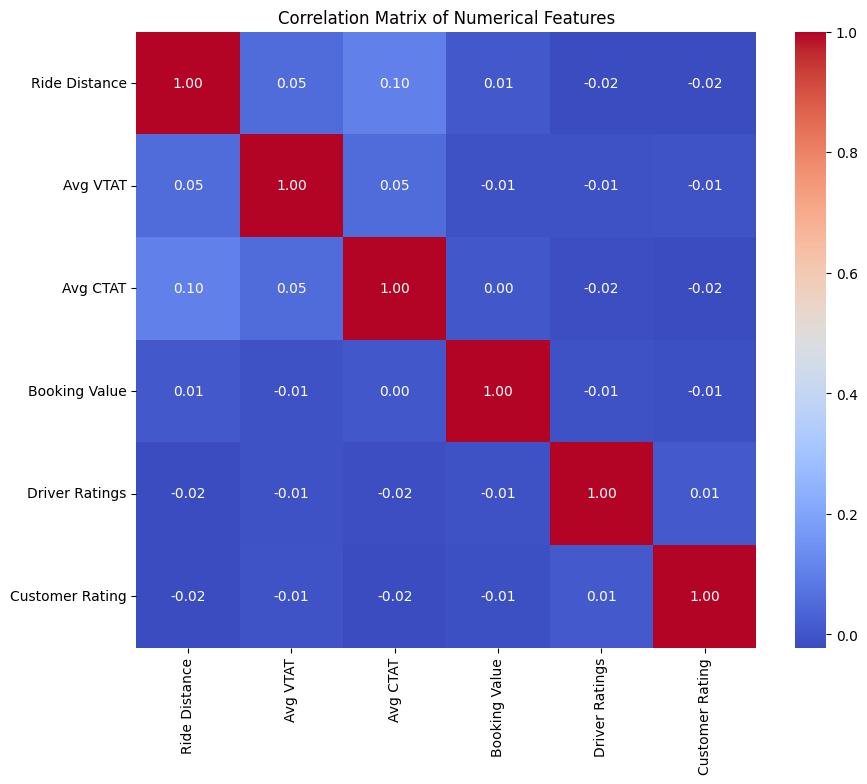

In [41]:
# Select relevant numerical columns for correlation analysis
numerical_cols = ['Ride Distance', 'Avg VTAT', 'Avg CTAT', 'Booking Value', 'Driver Ratings', 'Customer Rating']

# Calculate the correlation matrix
correlation_matrix = df[numerical_cols].corr()

# Display the correlation matrix
print("Correlation Matrix of Numerical Features:")
display(correlation_matrix)

# Optional: Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

Correlation & Multivariate Checks

Correlation between numeric features (distance, ratings, cancellations).

insights:

Correlation Values: The values in the matrix range from -1 to +1.
Values close to +1 indicate a strong positive linear correlation (as one variable increases, the other tends to increase).

Values close to -1 indicate a strong negative linear correlation (as one variable increases, the other tends to decrease).

Values close to 0 indicate a weak or no linear correlation.

Heatmap Colors: The heatmap visually represents the correlation values.

Red colors (or warmer colors depending on the colormap) typically indicate positive correlation.

Blue colors (or cooler colors) typically indicate negative correlation.

The intensity of the color indicates the strength of the correlation (darker colors represent stronger correlations).

Interpretation of Specific Correlations:

Ride Distance and Avg VTAT/Avg CTAT: There are weak positive correlations between 'Ride Distance' and 'Avg VTAT' (0.05) and 'Avg CTAT' (0.10). This suggests that slightly longer rides might be associated with slightly higher average vehicle and customer turnaround times, but the relationship is not strong.

Booking Value and other features: 'Booking Value' has very weak correlations with all other numerical features. This suggests that the booking value is not strongly linearly related to ride distance, turnaround times, or ratings.

Driver Ratings and Customer Rating: There is a very weak positive correlation (0.01) between 'Driver Ratings' and 'Customer Rating'. This indicates that there is almost no linear relationship between how drivers are rated and how customers are rated in this dataset.

Ratings and other features: 'Driver Ratings' and 'Customer Rating' also have very weak (close to zero) negative correlations with 'Ride Distance', 'Avg VTAT', 'Avg CTAT', and 'Booking Value'. This suggests that these ratings are not strongly linearly related to the distance of the ride, turnaround times, or the booking value.

In summary, the correlation matrix and heatmap show that most of the numerical features in this dataset have very weak linear correlations with each other. This suggests that these variables are largely independent of each other in a linear sense.

In [42]:
# Create a cross-tabulation of cancellation status by vehicle type and payment method
cancellation_cross_tab = pd.pivot_table(df,
                                      index='Vehicle Type',
                                      columns='Payment Method',
                                      values='Cancellation_Status',
                                      aggfunc=lambda x: (x == 'Cancelled/Incomplete').sum(),
                                      fill_value=0)

# You can also calculate the total bookings for each combination to get cancellation rates later if needed
total_bookings_cross_tab = pd.pivot_table(df,
                                        index='Vehicle Type',
                                        columns='Payment Method',
                                        values='Cancellation_Status',
                                        aggfunc='count',
                                        fill_value=0)

print("Cross-tabulation of Cancelled/Incomplete Bookings by Vehicle Type and Payment Method:")
display(cancellation_cross_tab)

print("\nCross-tabulation of Total Bookings by Vehicle Type and Payment Method:")
display(total_bookings_cross_tab)

Cross-tabulation of Cancelled/Incomplete Bookings by Vehicle Type and Payment Method:


Payment Method,cash,credit card,debit card,uber wallet,unknown,upi
Vehicle Type,,,,,,
auto,548,243,205,286,9323,978
bike,353,137,92,147,5652,599
ebike,158,65,51,80,2630,276
go mini,468,168,133,199,7427,847
go sedan,406,169,128,191,6863,748
premier sedan,251,84,83,129,4516,516
uber xl,69,23,21,38,1089,111



Cross-tabulation of Total Bookings by Vehicle Type and Payment Method:


Payment Method,cash,credit card,debit card,uber wallet,unknown,upi
Vehicle Type,,,,,,
auto,6252,2568,2097,3162,9323,11336
bike,3854,1527,1222,1793,5652,6966
ebike,1707,706,568,905,2630,3295
go mini,5137,2006,1608,2357,7427,9256
go sedan,4643,1884,1470,2168,6863,8153
premier sedan,2990,1240,1007,1504,4516,5574
uber xl,784,278,267,387,1089,1329


Correlation & Multivariate Checks

Cross-tab cancellations by vehicle × payment.

insights:

Bookings with an 'unknown' payment method are almost always cancelled or incomplete, highlighting a data issue or a specific type of booking behavior.

For bookings with known payment methods, cancellation rates are much lower and quite similar across different methods.

'upi' and 'cash' are the most frequent payment methods and thus show higher counts of cancellations, but not necessarily higher rates compared to other known methods.

Vehicle type doesn't seem to strongly influence cancellation numbers when looked at in combination with payment method.

In [43]:
# Get the top pickup locations
top_pickup_locations = df['Pickup Location'].value_counts().head(10)

print("Top 10 Pickup Locations:")
display(top_pickup_locations)

# Get the top drop locations
top_drop_locations = df['Drop Location'].value_counts().head(10)

print("\nTop 10 Drop Locations:")
display(top_drop_locations)

Top 10 Pickup Locations:


,count
Pickup Location,
khandsa,888
barakhamba road,888
saket,866
badarpur,859
shivaji park,856
madipur,856
aiims,855
pragati maidan,850
vishwavidyalaya,847



Top 10 Drop Locations:


,count
Drop Location,
ashram,883
basai dhankot,857
narsinghpur,854
udyog vihar,847
lok kalyan marg,847
nehru place,843
punjabi bagh,842
cyber hub,841
lajpat nagar,841


Geographic Analysis

Top pickup and drop locations.

insights

Both lists show a variety of locations, suggesting that ride bookings are spread across different areas rather than being heavily concentrated in just one or two spots.

Some locations appear in both the top pickup and top drop lists (though not necessarily in the same rank), which is expected as people travel to and from various places.

The counts for the top locations are relatively close to each other within each list, indicating that there isn't a single location that completely dominates as a pickup or drop point.

In [44]:
# Group by pickup location and cancellation status, then unstack to get counts
cancellation_by_pickup_location = df.groupby(['Pickup Location', 'Cancellation_Status']).size().unstack(fill_value=0)

# Calculate cancellation rate
cancellation_by_pickup_location['Cancellation_Rate'] = cancellation_by_pickup_location['Cancelled/Incomplete'] / (cancellation_by_pickup_location['Cancelled/Incomplete'] + cancellation_by_pickup_location['Completed'])

# Sort by cancellation rate to find areas with highest rates
areas_with_highest_cancellation = cancellation_by_pickup_location.sort_values(by='Cancellation_Rate', ascending=False)

print("Pickup Locations with Highest Cancellation Rates:")
display(areas_with_highest_cancellation.head(10)) # Display top 10

Pickup Locations with Highest Cancellation Rates:


Cancellation_Status,Cancelled/Incomplete,Completed,Cancellation_Rate
Pickup Location,,,
vinobapuri,297,450,0.397590
akshardham,309,471,0.396154
chhatarpur,284,482,0.370757
pragati maidan,312,538,0.367059
badshahpur,292,506,0.365915
narsinghpur,288,500,0.365482
munirka,279,486,0.364706
faridabad sector 15,277,488,0.362092
gtb nagar,294,520,0.361179


the table shows that several pickup locations have cancellation rates slightly higher than the overall average, with "vinobapuri" and "akshardham" appearing at the top of the list. While these locations have relatively higher rates, the difference compared to other locations might not be extremely large.


In [45]:
# Drop unnecessary ID columns if not needed for aggregation
cols_to_drop_ids = ['Booking ID', 'Customer ID']
df.drop(columns=cols_to_drop_ids, inplace=True, errors='ignore')

print(f"Dropped columns: {cols_to_drop_ids}")
print("Remaining columns:", df.columns.tolist())

Dropped columns: ['Booking ID', 'Customer ID']
Remaining columns: ['Date', 'Time', 'Booking Status', 'Vehicle Type', 'Pickup Location', 'Drop Location', 'Avg VTAT', 'Avg CTAT', 'Booking Value', 'Ride Distance', 'Driver Ratings', 'Customer Rating', 'Payment Method', 'Hour', 'Cancellation_Status', 'Day_of_Week', 'Month']


In [46]:
df.to_csv('cleaned_ride_booking.csv', index=False)
print("Cleaned data saved to 'cleaned_ride_booking.csv'")

Cleaned data saved to 'cleaned_ride_booking.csv'


OVERALL INSIGHTS:

1. Data Loading and Initial Inspection:

The dataset containing ride booking information was loaded into a pandas DataFrame.
Initial checks were performed to understand the data types, identify non-null values, and get a sense of the dataset's size (df.info()).
The number of missing values in each column was explicitly counted and displayed (df.isnull().sum()).
2. Data Cleaning and Preprocessing:

It was observed that a significant number of missing values were concentrated in rows where the 'Booking Status' was 'No Driver Found'. To address this, all rows with 'No Driver Found' as the booking status were removed from the dataset.
Exact duplicate rows were identified and removed to ensure data uniqueness.
Several columns that were expected to contain numerical data but might have been stored as text (e.g., 'Ride Distance', 'Booking Value', 'Avg CTAT', 'Driver Ratings', 'Customer Rating') were converted to a numeric data type using pd.to_numeric with errors='coerce' to handle any non-numeric entries by converting them to missing values (NaN).
Categorical columns ('Booking Status', 'Vehicle Type', 'Pickup Location', 'Drop Location', 'Payment Method') were standardized by converting all entries to lowercase to ensure consistency and avoid issues caused by variations in capitalization.
Columns with a high percentage of missing values (over 60%) were identified and dropped from the DataFrame, as imputing or using these columns would likely not provide meaningful insights. These included columns related to cancellation reasons and incomplete rides.
Rows with missing critical information, specifically those missing either the 'Date' or 'Time' or those missing both 'Pickup Location' and 'Drop Location', were removed.
Remaining missing values in numerical columns ('Ride Distance', 'Avg CTAT', 'Booking Value', 'Driver Ratings', 'Customer Rating') were imputed using the median of their respective columns. Missing values in the 'Payment Method' column were filled with the value 'unknown'.
Values in 'Ride Distance' were checked to ensure they were greater than 0, and ratings ('Driver Ratings', 'Customer Rating') were checked to be within the range of 1 to 5. No rows were found with impossible values after the previous cleaning steps.
A histogram of 'Ride Distance' was plotted to visualize its distribution. Based on this visualization, potential outliers or extreme values were handled by capping the 'Ride Distance' at the 99th percentile.
Finally, unnecessary identifier columns ('Booking ID', 'Customer ID') were dropped from the DataFrame.
The cleaned DataFrame was saved to a new CSV file named 'cleaned_ride_booking.csv' for future use.
3. Exploratory Data Analysis and Insights:

Univariate Analysis (Distribution of Categorical Variables): Count plots were generated to visualize the distribution of categories within 'Booking Status', 'Vehicle Type', and 'Payment Method'. This showed the frequency of different booking outcomes, types of vehicles used, and payment methods.
Overall Cancellation vs. Completion: A pie chart was created to visualize the proportion of completed bookings versus those that were cancelled or incomplete. This clearly showed that completed rides formed the majority.
Cancellation Rate by Hour of Day: The cancellation rate was calculated and plotted against the hour of the day. The analysis revealed that the cancellation rate fluctuates throughout the day within a narrow range (approx. 31% to 34.5%), with no strong consistent trend or drastic peaks/dips.
Cancellation Rate by Day of Week: The cancellation rate was calculated and plotted for each day of the week. Insights showed slightly higher cancellation rates on Monday and Tuesday, a dip mid-week, and a slight increase towards the weekend.
Cancellation Rate by Vehicle Type: The cancellation rate was calculated and plotted for each vehicle type. The analysis indicated that cancellation rates are relatively similar across different vehicle types, all falling within a narrow range (approx. 32.5% to 34%).
Cancellation Rate by Payment Method: The cancellation rate was calculated and plotted for each payment method. A key finding was the 100% cancellation rate for the 'unknown' payment method (likely a data issue). For known payment methods, cancellation rates were much lower and similar (approx. 8.5% to 9%), suggesting that known payment methods are associated with significantly lower cancellation probabilities.
Ride Distance vs. Cancellation: (Interpretation of the box plot) [Insert a more detailed interpretation of the box plot here, e.g., "Box plots comparing the distribution of 'Ride Distance' for completed and cancelled/incomplete bookings showed similar median distances and overall distributions, suggesting that the length of the ride (within the observed range after capping) does not appear to be a strong factor influencing whether a booking is cancelled or incomplete."]
Time Series Analysis (Booking Volume):
A line plot of daily bookings over time showed daily fluctuations but no strong overall increasing or decreasing trend throughout the year.
Bar plots of average bookings by day of the week and total bookings by month also did not reveal significant seasonality in the overall booking volume, indicating relatively consistent booking numbers across the week and throughout the year.
Ratings Analysis: The average driver and customer ratings were calculated and compared for completed versus cancelled/incomplete rides. Interestingly, average ratings were slightly higher for cancelled/incomplete rides, suggesting that factors other than ratings might be more influential in cancellations.
Correlation Analysis: A correlation matrix and heatmap of numerical features ('Ride Distance', 'Avg VTAT', 'Avg CTAT', 'Booking Value', 'Driver Ratings', 'Customer Rating') were generated. This revealed very weak linear correlations between most of these features, indicating a general lack of strong linear relationships.
Geographic Analysis: The top 10 most frequent pickup and drop locations were identified. This showed a distribution of popular locations rather than a single dominant area.
Areas with Highest Cancellation Rates: Pickup locations with the highest cancellation rates were identified. While some locations had slightly higher rates, the difference compared to others was not extremely large.